# Imports

In [1]:
import numpy as np
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import load_data as ld

In [4]:
%matplotlib inline

# Initiate Umapper

In [5]:
umapper = umap.UMAP(random_state=0)

In [6]:
all_class_spca_df = pd.read_csv("class_call_df.csv", index_col=0)
combo_df = pd.read_csv('combo_df.csv')
spca_df = pd.read_csv('spca_df.csv')
culture_spca_df = pd.read_csv('culture_spca190710_df.csv')

In [5]:
#y = umapper.fit_transform(spca_df.values)

In [7]:
data_cols = [str(i) for i in range(47)]

In [7]:
unique= all_class_spca_df['class'].unique()

In [8]:
mapper = {k: i for i, k in enumerate(unique)}
mapper[np.nan] = -1

In [9]:
mapper

{nan: -1, 'LAMP5': 1, 'VIP': 2, 'PVALB': 3, 'SST': 4}

In [10]:
types_int = [mapper[c] for c in all_class_spca_df["class"]]

In [11]:
all_class_spca_df[data_cols].values.shape
all_class_spca_df[data_cols].values

array([[-0.58940406, -1.42007791, -0.69633073, ..., -1.29217146,
        -0.2480311 , -1.62738549],
       [-0.43463267, -1.24348813, -1.5174596 , ...,  1.41753916,
         0.54387991,  0.69038069],
       [-0.39447071, -0.72624818,  0.0688356 , ...,  0.84612229,
        -2.93019267,  0.248344  ],
       ...,
       [ 0.04756008,  0.44465387,  0.57651602, ...,  0.27159818,
        -0.07390157,  0.88053346],
       [ 0.55661158,  0.40059975, -0.96168973, ...,  0.59056157,
         0.76530983,  0.97298845],
       [ 0.18513996,  0.05675252,  0.04216032, ...,  0.82711107,
        -0.1082859 ,  0.06180151]])

In [12]:
len(types_int)

508

## mapping acute and culture into combined maping space

In [13]:
z = umapper.fit_transform(all_class_spca_df[data_cols].values, y=np.array(types_int))

C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\umap\umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "..\..\..\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\umap\umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
C:\Users\lindsayn\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "..\..\..\AppData\Local\Continuum\anaconda2\envs\umap3\lib\site-packages\umap\umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
C:\Use

In [14]:
w = umapper.fit_transform(spca_df[data_cols].values)

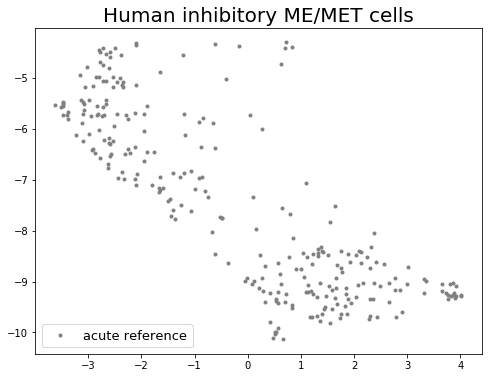

In [17]:
plt.figure(figsize = (8,6))
plt.plot(z[~culture_mask, 0], z[~culture_mask, 1], '.', c="gray", label= "acute reference")
plt.title('Human inhibitory ME/MET cells', fontsize = 20)
plt.legend(fontsize = 13, loc ='lower left')
plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/acute_umap.png")

In [16]:
culture_mask = np.array([False] * spca_df.shape[0] + [True] * culture_spca_df.shape[0])

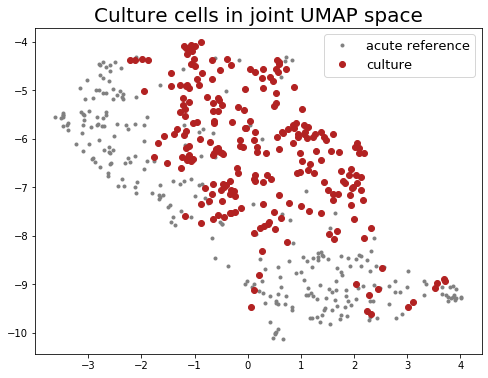

In [187]:
plt.figure(figsize = (8,6))
plt.plot(z[:, 0], z[:, 1], '.', c="gray", label= "acute reference")
plt.plot(z[culture_mask, 0], z[culture_mask, 1], 'o', c="firebrick", label= "culture")
plt.legend(fontsize= 13)
plt.title('Culture cells in joint UMAP space', fontsize = 20)
plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/joint_umap.png")

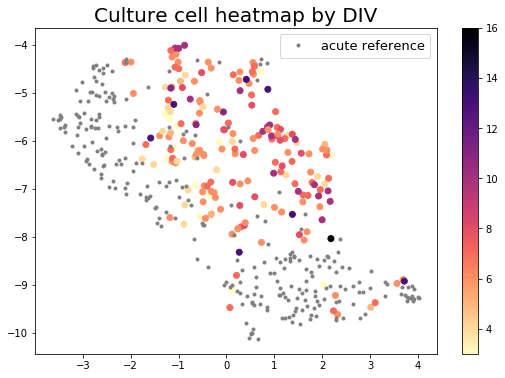

In [18]:
plt.figure(figsize = (9,6))
#plt.plot(z[:, 0], z[:, 1], '.', c="gray", label= "acute reference")
plt.plot(z[~culture_mask, 0], z[~culture_mask, 1], '.', c="gray", label= "acute reference")
#plt.plot(z[culture_mask, 0], z[culture_mask, 1], 'o', c="firebrick", label= "culture")
plt.scatter(z[:, 0], z[:, 1], c=all_class_spca_df['DIV'].values, cmap="magma_r")
plt.colorbar()
plt.legend(fontsize= 13)
plt.title('Culture cell heatmap by DIV', fontsize = 20)
plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/DIV_umap.png")

In [16]:
z_regular = umapper.fit_transform(all_class_spca_df[data_cols].values)

## checking to see which features differ between culture and acute

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(z[:, 0], z[:, 1], c=all_class_spca_df.iloc[:,12].values, cmap="magma")
plt.colorbar()
#plt.title("All cell heatmap by vector 13: 'subthreshold_norm 0'", fontsize = 20)
#plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/subthreshold_umap.png")

NameError: name 'z' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
13,10,24

In [14]:
with open("\\\\allen\\programs\\celltypes\\workgroups\\ivscc\\nathang\\spca_output\\spca_components_used_human_inh_me_met.json", "r") as f:
    spca_info = json.load(f)
counter = 0
mapper = {}
for ds in spca_info:
    for ind in ds["indices"]:
        mapper[counter] = "{:s} {:d}".format(ds["key"], ind)
        counter += 1
print (mapper)
spcas = pd.DataFrame.from_dict(mapper, orient='index')
spcas

{0: 'first_ap_v 0', 1: 'first_ap_v 1', 2: 'first_ap_v 2', 3: 'first_ap_v 3', 4: 'first_ap_dv 0', 5: 'first_ap_dv 1', 6: 'first_ap_dv 2', 7: 'isi_shape 0', 8: 'isi_shape 1', 9: 'isi_shape 2', 10: 'step_subthresh 0', 11: 'step_subthresh 1', 12: 'step_subthresh 2', 13: 'subthresh_norm 0', 14: 'subthresh_norm 1', 15: 'subthresh_norm 2', 16: 'subthresh_norm 3', 17: 'subthresh_norm 4', 18: 'spiking_rate 0', 19: 'spiking_rate 1', 20: 'spiking_rate 2', 21: 'spiking_rate 3', 22: 'spiking_rate 4', 23: 'spiking_rate 5', 24: 'spiking_inst_freq 0', 25: 'spiking_inst_freq 1', 26: 'spiking_inst_freq 2', 27: 'spiking_inst_freq 3', 28: 'spiking_inst_freq 4', 29: 'spiking_updown 0', 30: 'spiking_updown 1', 31: 'spiking_peak_v 0', 32: 'spiking_peak_v 1', 33: 'spiking_fast_trough_v 0', 34: 'spiking_fast_trough_v 1', 35: 'spiking_threshold_v 0', 36: 'spiking_threshold_v 1', 37: 'spiking_width 0', 38: 'spiking_width 1', 39: 'inst_freq_norm 0', 40: 'inst_freq_norm 1', 41: 'inst_freq_norm 2', 42: 'inst_freq_n

,0
0,first_ap_v 0
1,first_ap_v 1
2,first_ap_v 2
3,first_ap_v 3
4,first_ap_dv 0
5,first_ap_dv 1
6,first_ap_dv 2
7,isi_shape 0
8,isi_shape 1
9,isi_shape 2


## plotting umap comparing culture and acute by transcriptomic class

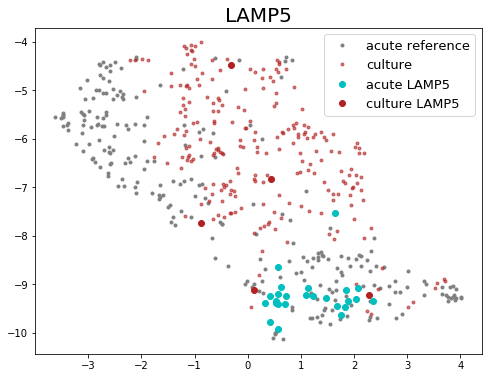

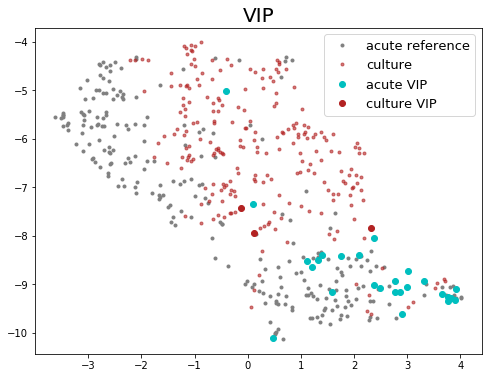

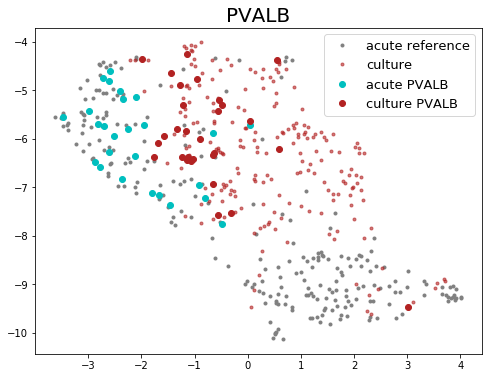

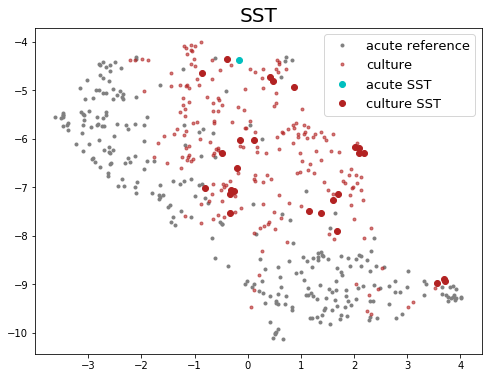

In [19]:
for cc in all_class_spca_df["class"].unique():
    if type(cc) is not str:
        continue
    plt.figure(figsize = (8,6))
    mask_class_culture = (all_class_spca_df["class"] == cc) & culture_mask
    mask_class_not_culture = (all_class_spca_df["class"] == cc) & ~culture_mask
    plt.plot(z[~culture_mask, 0], z[~culture_mask, 1], '.', c="gray", label= "acute reference")
    plt.plot(z[culture_mask, 0], z[culture_mask, 1], '.',alpha=0.6, c='firebrick', label= "culture")
    plt.plot(z[mask_class_not_culture, 0], z[mask_class_not_culture, 1], 'o', c="c", label= "acute " + cc)
    plt.plot(z[mask_class_culture, 0], z[mask_class_culture, 1], 'o', c="firebrick", label= "culture " + cc)
    plt.title(cc, fontsize = 20)
    plt.legend(fontsize = 13)
    plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/{}_culture_acute_umap4.png".format(cc))
#plt.savefig("culture_umap.png")

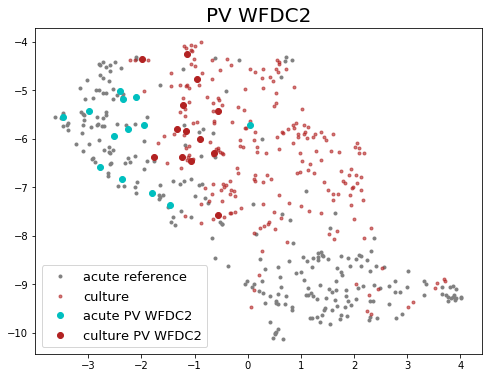

In [20]:
plt.figure(figsize = (8,6))
mask_class_culture = (all_class_spca_df["cluster_label"] == 'Inh L2-4 PVALB WFDC2') & culture_mask
mask_class_not_culture = (all_class_spca_df["cluster_label"] == 'Inh L2-4 PVALB WFDC2') & ~culture_mask
plt.plot(z[~culture_mask, 0], z[~culture_mask, 1], '.', c="gray", label= "acute reference")
plt.plot(z[culture_mask, 0], z[culture_mask, 1], '.',alpha=0.6, c='firebrick', label= "culture")
plt.plot(z[mask_class_not_culture, 0], z[mask_class_not_culture, 1], 'o', c="c", label= "acute " + "PV WFDC2")
plt.plot(z[mask_class_culture, 0], z[mask_class_culture, 1], 'o', c="firebrick", label= "culture " + "PV WFDC2")
plt.title("PV WFDC2", fontsize = 20)
plt.legend(fontsize = 13)
plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/PVWFDC2_culture_acute_umap4.png")
#plt.savefig("culture_umap.png")

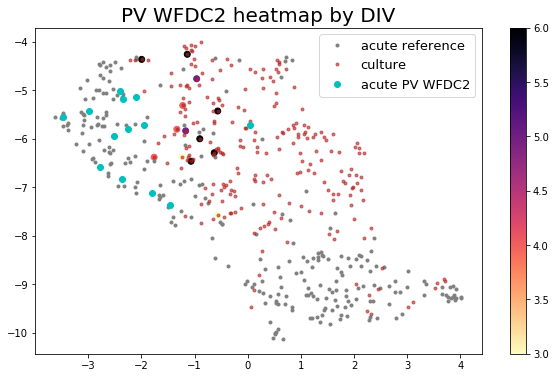

In [223]:
plt.figure(figsize = (10,6))
mask_class_culture = (all_class_spca_df["cluster_label"] == 'Inh L2-4 PVALB WFDC2') & culture_mask
mask_class_not_culture = (all_class_spca_df["cluster_label"] == 'Inh L2-4 PVALB WFDC2') & ~culture_mask
plt.plot(z[~culture_mask, 0], z[~culture_mask, 1], '.', c="gray", label= "acute reference")
plt.plot(z[culture_mask, 0], z[culture_mask, 1], '.',alpha=0.6, c='firebrick', label= "culture")
plt.plot(z[mask_class_not_culture, 0], z[mask_class_not_culture, 1], 'o', c="c", label= "acute " + "PV WFDC2")
#plt.scatter(z[:, 0], z[:, 1], c=all_class_spca_df['DIV'].values, cmap="magma_r")
plt.scatter(z[mask_class_culture, 0], z[mask_class_culture, 1], c=all_class_spca_df[mask_class_culture]['DIV'].values, cmap="magma_r")
plt.title("PV WFDC2 heatmap by DIV", fontsize = 20)
plt.legend(fontsize = 13)
plt.colorbar()
plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/umap/PVWFDC2_DIV_culture_acute_umap3.png")
#plt.savefig("culture_umap.png")

In [20]:
classes= pd.read_csv('class_by_id.csv')

In [21]:
orig_file = "\\\\allen\\programs\\celltypes\\workgroups\\ivscc\\nathang\\spca_output\\sparse_pca_components_human_inh_me_met.csv"
spca_df = pd.read_csv(orig_file, index_col=0)


In [22]:
culture_spca_df = pd.read_csv("culture_spca.csv", index_col=0)

## forcing culture cells into acute space

In [23]:
trans = umapper.fit(spca_df.values)
i= trans.transform(culture_spca_df.values)

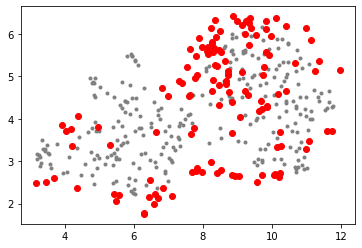

In [24]:
plt.plot(trans.embedding_[:,0],trans.embedding_[:,1], '.', c='gray')
plt.plot(i[:, 0], i[:, 1], 'o', c="red")

In [19]:
all_class_spca_df

,index,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,class,specimen_id
0,488386504,-0.589404,-1.420078,-0.696331,-0.636510,-0.009487,-1.349655,0.330378,0.380669,-0.081579,...,-1.594831,-0.587235,-0.817098,0.820578,0.100433,-1.292171,-0.248031,-1.627385,NaN,NaN
1,488386626,-0.434633,-1.243488,-1.517460,-0.138346,0.089382,-1.423242,-1.404030,-0.136525,-0.849850,...,-1.622310,-0.424861,-1.406682,-0.217615,0.821575,1.417539,0.543880,0.690381,NaN,NaN
2,488400343,-0.394471,-0.726248,0.068836,-0.866358,-0.023302,-0.312598,-0.432061,-0.508505,-1.094807,...,-0.869683,0.928861,-0.536391,-1.928981,-0.792165,0.846122,-2.930193,0.248344,NaN,NaN
3,488418027,-0.475845,-1.019352,0.064222,-0.096045,0.050059,-0.929475,-0.041587,-0.225503,-1.886105,...,-1.363780,-0.392785,-0.491615,0.711858,-1.248337,0.924385,0.854300,-0.619302,NaN,NaN
4,508281653,-0.607842,-1.346662,-0.349883,-0.272765,0.037366,-1.622753,-0.346276,0.045495,-1.450740,...,-1.304404,0.320448,-1.641611,-0.649973,0.988883,0.554436,-0.897670,0.948719,NaN,NaN
5,508381644,-0.487756,-0.762927,0.626424,-0.381491,-0.050333,-0.495437,0.237661,-1.682302,-0.762200,...,-1.245865,-0.443245,0.054543,1.162033,-1.822770,0.533993,0.690580,-0.724110,NaN,NaN
6,508400236,-0.493279,-1.016791,0.139558,-0.369844,-0.011565,-0.811032,0.164276,-1.918103,-0.877647,...,-1.536566,-0.374617,-1.403870,-0.301857,0.772509,1.098612,0.690649,0.592462,NaN,NaN
7,519853636,0.666816,1.238174,-3.347922,-1.327675,-0.114303,1.098586,-2.886635,1.416339,-0.309595,...,-1.206803,-0.912676,0.286152,1.649857,-1.069955,0.326472,-0.598128,-0.012073,NaN,NaN
8,520631985,-0.298108,-0.200289,1.086284,-0.719679,-0.057495,0.283573,0.300458,-2.090431,-1.540521,...,0.706652,1.483010,1.493565,0.828340,0.673638,0.129636,0.500959,0.521398,NaN,NaN
9,525018757,-0.425585,-0.958019,0.178196,0.587048,-0.029946,-1.097561,1.531890,0.426491,-0.123878,...,0.425601,-0.791786,-1.146609,-2.074773,1.585761,0.819565,0.199808,-3.639364,NaN,NaN


In [10]:
all_class_spca_df['cluster_label'].value_counts()

Inh L2-4 PVALB WFDC2                  26
LHX6|c                                26
Inhibitory                            16
Inh L1-4 LAMP5 LCP2 (rosehip)          9
PVALB|b                                9
SST|g                                  7
Inh L1 SST NMBR (ADARB2+)              7
Inh L2-6 LAMP5 CA1 (Igtp)              5
Inh L2-4 SST FRZB                      5
Inh L1-2 VIP TSPAN12                   5
Inh L1-2 PAX6 CDH12                    5
Inh L1-3 SST CALB1                     5
PVALB|c                                4
Inh L1-2 GAD1 MC4R (ADARB2+)           4
Inh L3-5 SST ADGRG6                    4
FAIL                                   4
Inh L4-5 PVALB MEPE                    3
Inh L2-5 PVALB SCUBE3 (chandelier)     3
Inh L4-6 PVALB SULF1                   3
Inh L1-3 PAX6 SYT6 (Sncg)              3
SST (all)|b                            3
ADARB2                                 3
PVALB|a                                3
Inh L1-2 LAMP5 DBP                     2
VIP (Sncg-like) 